# Importing essential libraries

In [3]:
import pandas as pd                               #for data manipulation
import matplotlib.pyplot as plt                   #for data visualization
import seaborn as sns                             #for data visualization
import numpy as np


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Loading the dataset

In [4]:
data=pd.read_csv("heart.csv")

# Returns number of rows and columns of the dataset

In [5]:
print(data.shape)

(303, 14)


# Returns the first x number of rows when head(x). Without a number it returns 5

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Returns the last x number of rows when tail(x). Without a number it returns 5

In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Returns basic statistics

In [8]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


# Checking for missing values

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Number of male and female Patient in Dataset

In [10]:
count_Male = len(data[data.sex == 1])
count_Female = len(data[data.sex == 0])
print("Total Number of Male Patients = ",count_Male)
print("\nPercentage of Male Patients = {:.2f}%".format((count_Male)/(len(data.sex))*100))
print("\nTotal Number of Female Patients = ",count_Female)
print("\nPercentage of Female Patients = {:.2f}%".format((count_Female)/(len(data.sex))*100))

Total Number of Male Patients =  207

Percentage of Male Patients = 68.32%

Total Number of Female Patients =  96

Percentage of Female Patients = 31.68%


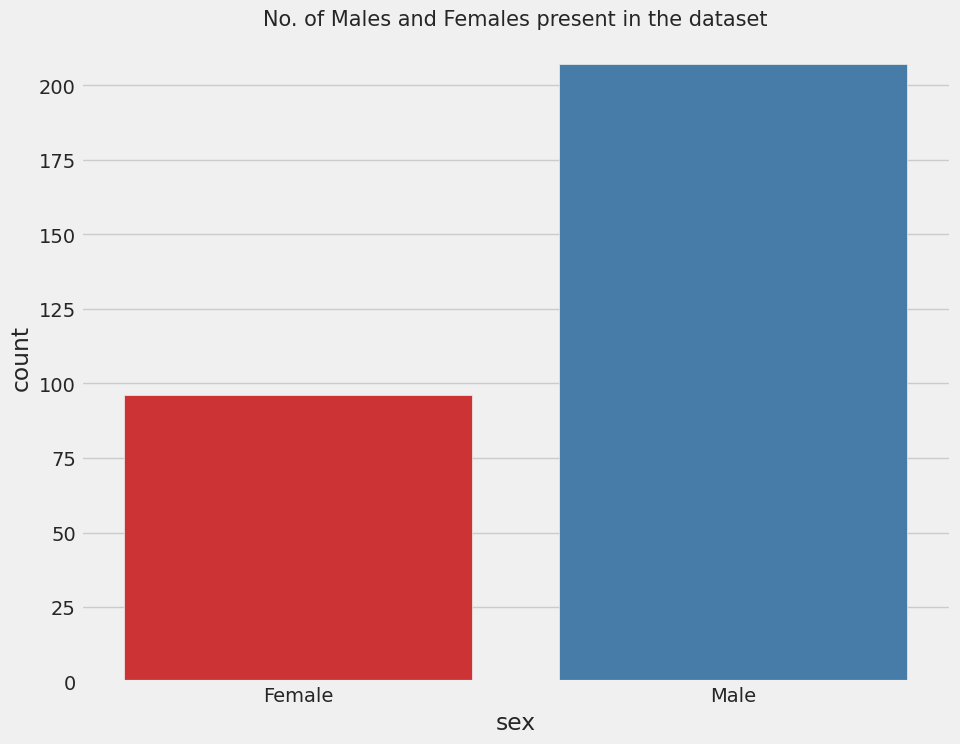

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='sex', data=data, palette='Set1')
plt.xticks(ticks=[1, 0], labels = ["Male", "Female"])
plt.title("No. of Males and Females present in the dataset", size=15)
plt.show()

# Total Number of Patient having or have not heart disease in Dataset

In [12]:
m=0
f=0
count_disease = len(data[data.target == 1])
count_nodisease = len(data[data.target == 0])
print("Total Number of Patients having Heart Diseases =  ",count_disease)
for i in data.index:
    if(data['sex'][i]==1 and data['target'][i]==1):
        m=m+1
    else:
        continue
print("\nNo. of Male patient suffering from heart disease = ",m)
for i in data.index:
    if(data['sex'][i]==0 and data['target'][i]==1):
        f=f+1
    else:
        continue
print("\nNo. of female patient suffering from heart disease = ",f)
print("\nPercentage of Patients Have Heart Disease = {:.2f}%".format((count_disease / (len(data.target))*100)))
print("\nTotal Number of Patients have not Heart Diseases = ",count_nodisease)
print("\nPercentage of Patients Haven't Heart Disease = {:.2f}%".format((count_nodisease / (len(data.target))*100)))

Total Number of Patients having Heart Diseases =   165

No. of Male patient suffering from heart disease =  93

No. of female patient suffering from heart disease =  72

Percentage of Patients Have Heart Disease = 54.46%

Total Number of Patients have not Heart Diseases =  138

Percentage of Patients Haven't Heart Disease = 45.54%


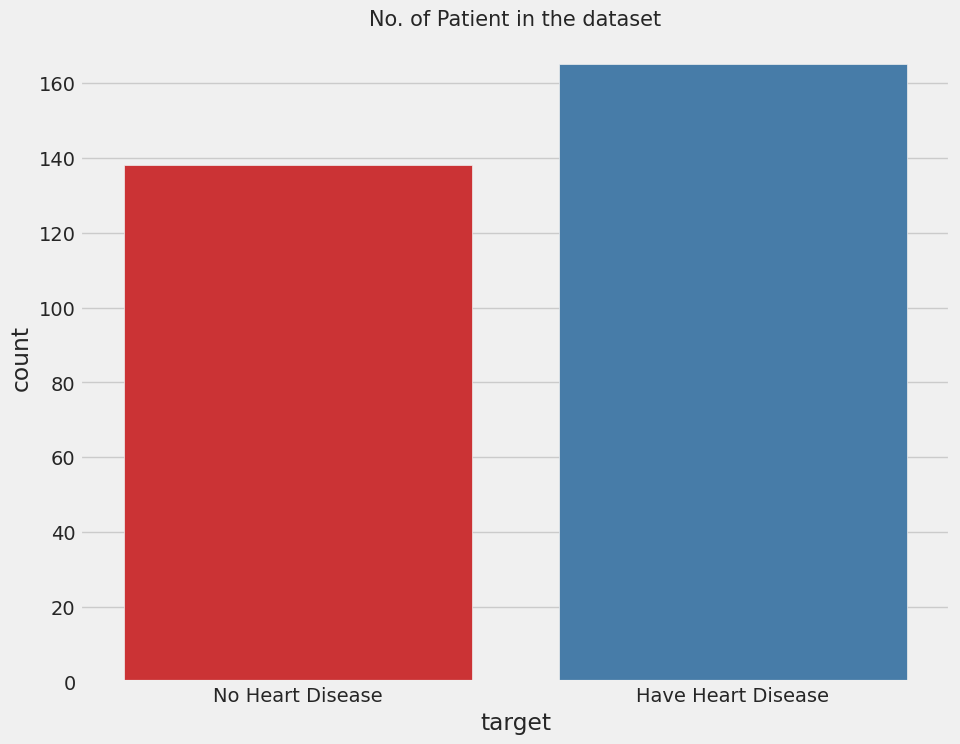

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='target', data=data, palette='Set1')
plt.xticks(ticks=[1, 0], labels = ["Have Heart Disease", "No Heart Disease"])
plt.title("No. of Patient in the dataset", size=15)
plt.show()

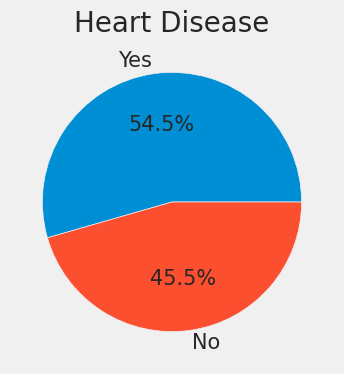

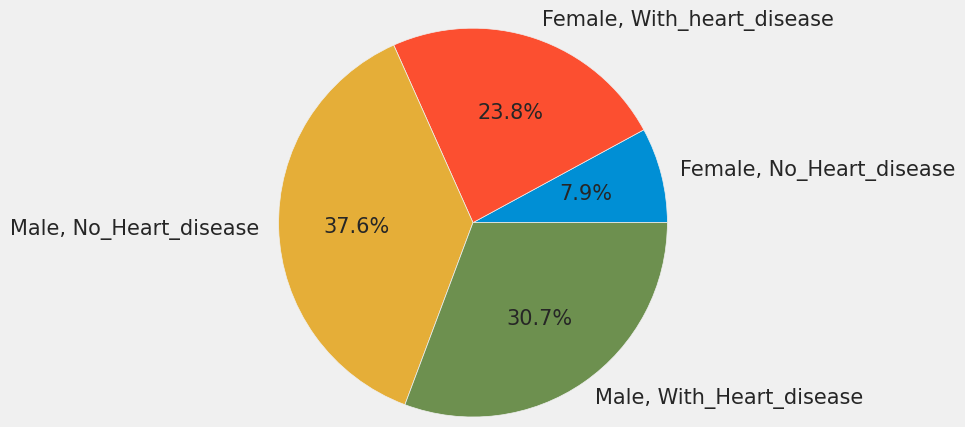

In [14]:
labels = ['Yes', 'No']
values = data['target'].value_counts().values
plt.rcParams["figure.figsize"] = (8,4)
plt.pie(values, labels=labels, autopct='%1.1f%%', textprops = {"fontsize" : 15})
plt.title('Heart Disease', fontsize=20)
plt.show()
data_gender = data.groupby(["sex","target"]).size() 
plt.pie(data_gender.values, labels = ["Female, No_Heart_disease", "Female, With_heart_disease", 
                                    "Male, No_Heart_disease", "Male, With_Heart_disease"],autopct='%1.1f%%',radius = 1.5, 
        textprops = {"fontsize" : 15})
plt.show()

We can see that, the dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. 
We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 
54% of the persons in the dataset have heart disease.

# Univariate Selection For categorical Variable and continous Variable

In [15]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [16]:
print("Categorical Values are = ",categorical_val)
print("Continous Values are = ",continous_val)

Categorical Values are =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continous Values are =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Plotting categorical_value histogram for the dataset

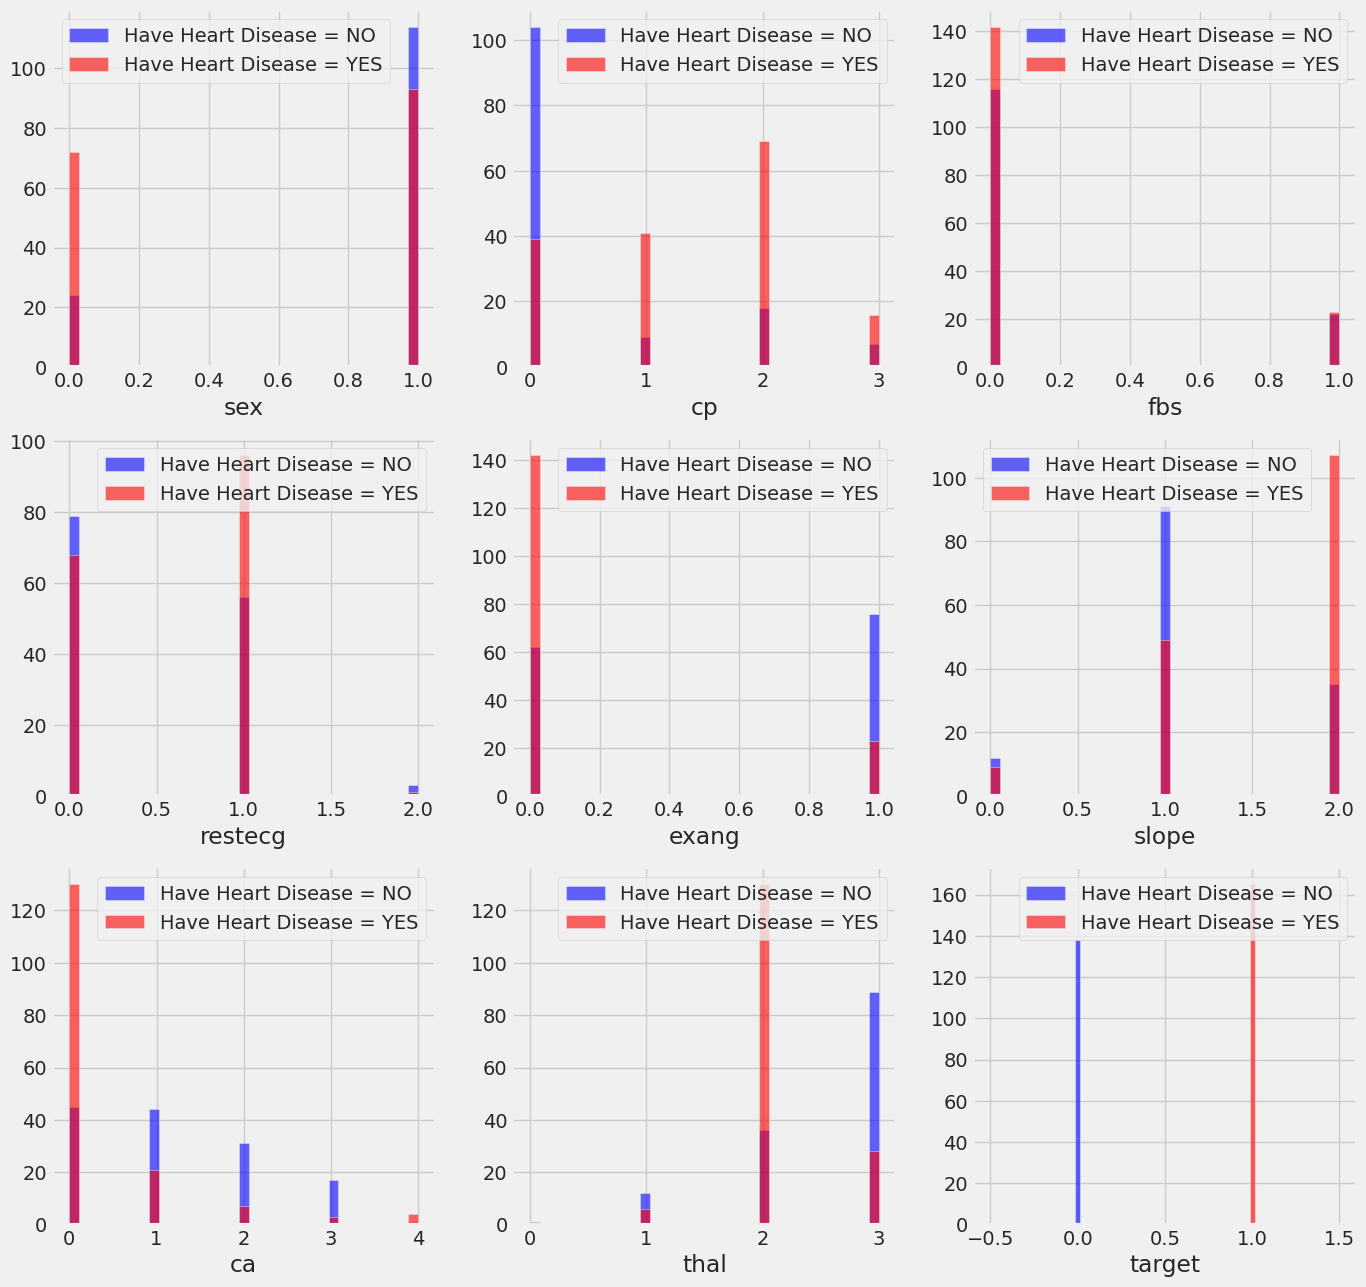

In [17]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Observations from the above plot

# Plotting continous_value histogram for the dataset

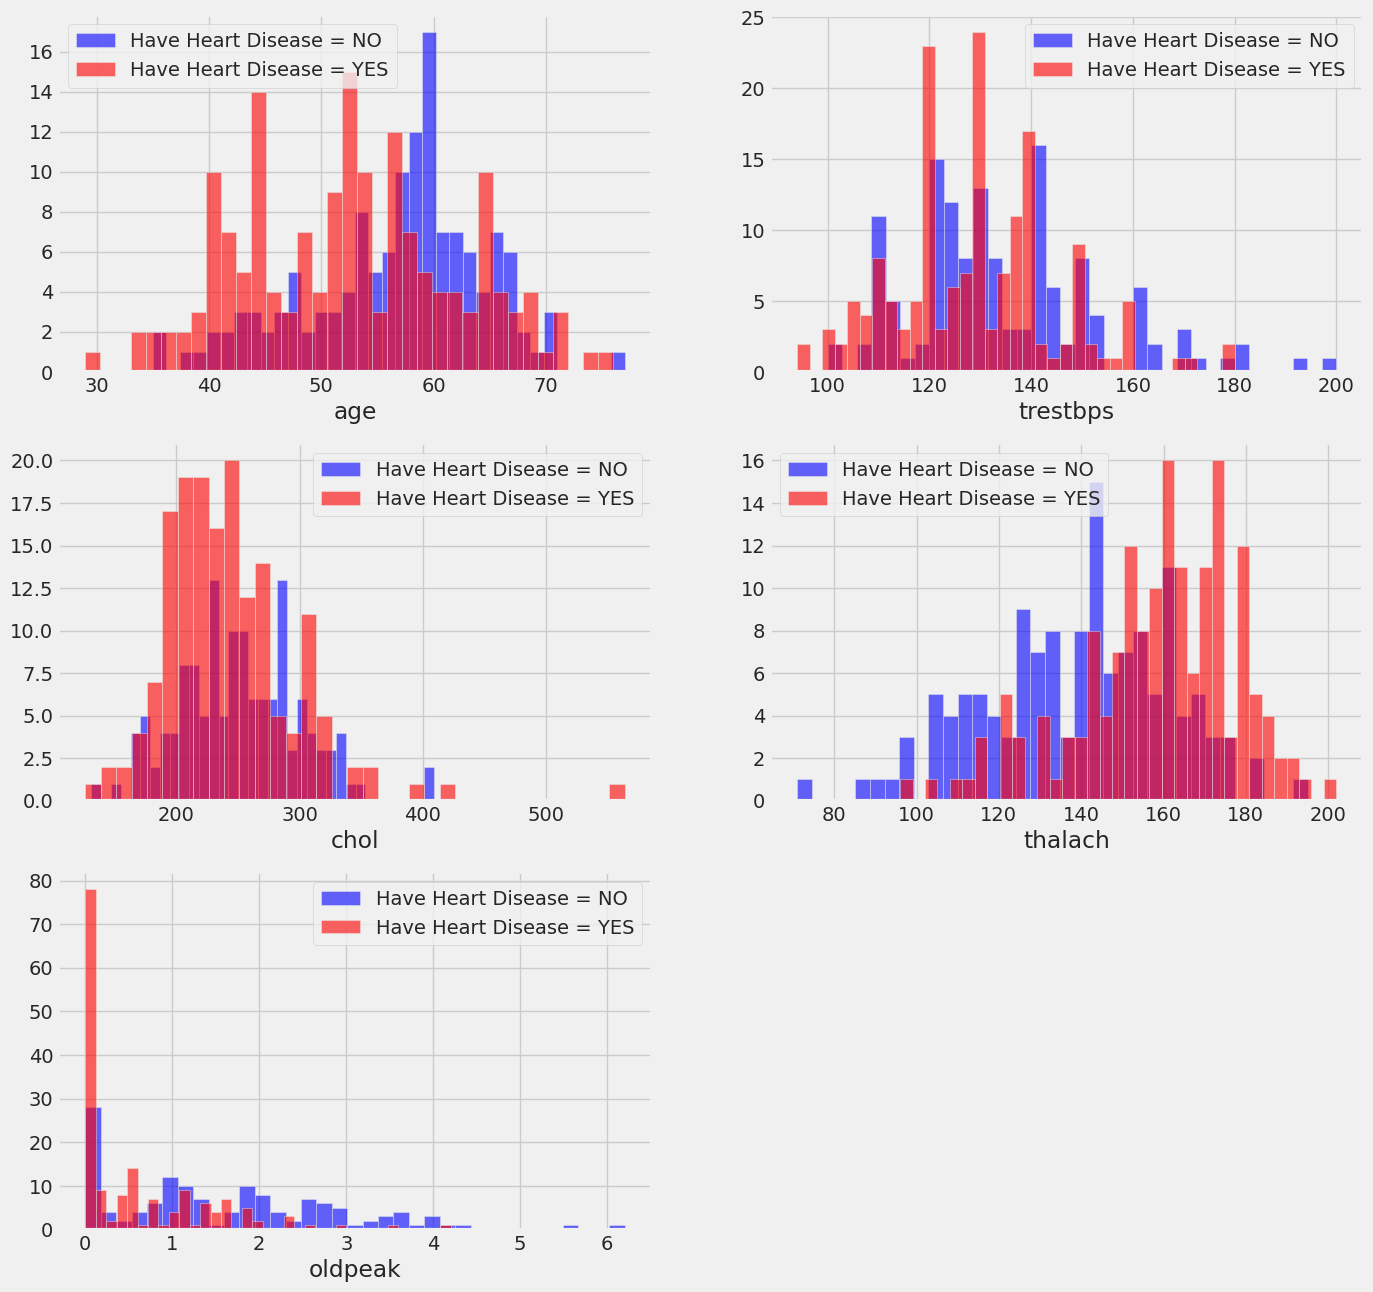

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Observations from the above plot

# Creating Another Plotting Figure

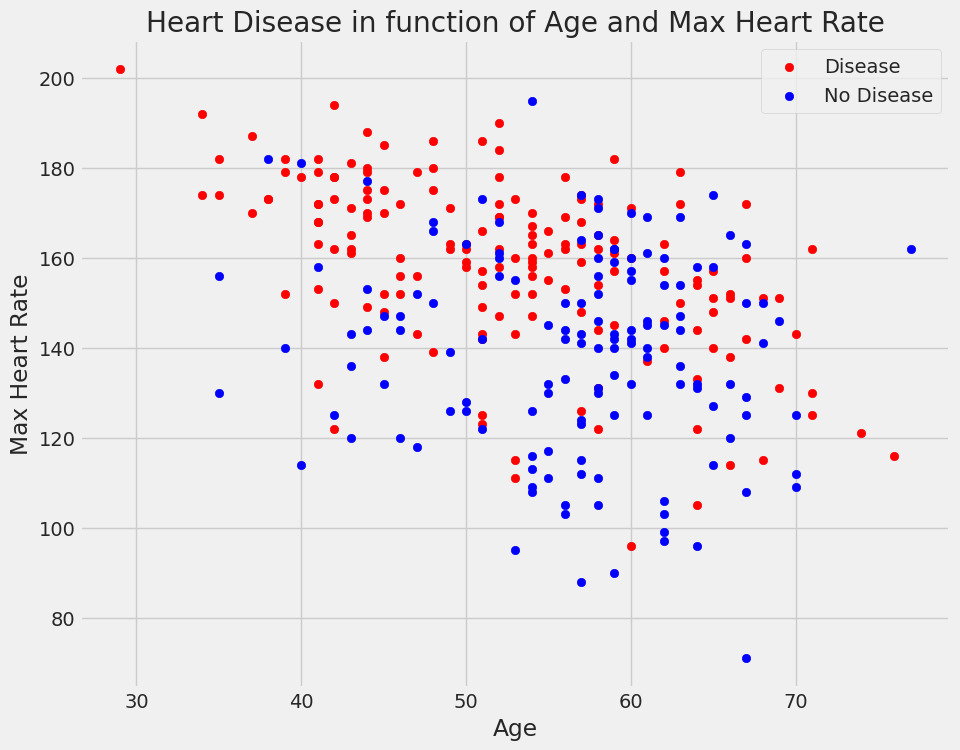

In [19]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# FEATURE SELECTION  with correlation matrix

(14.5, -0.5)

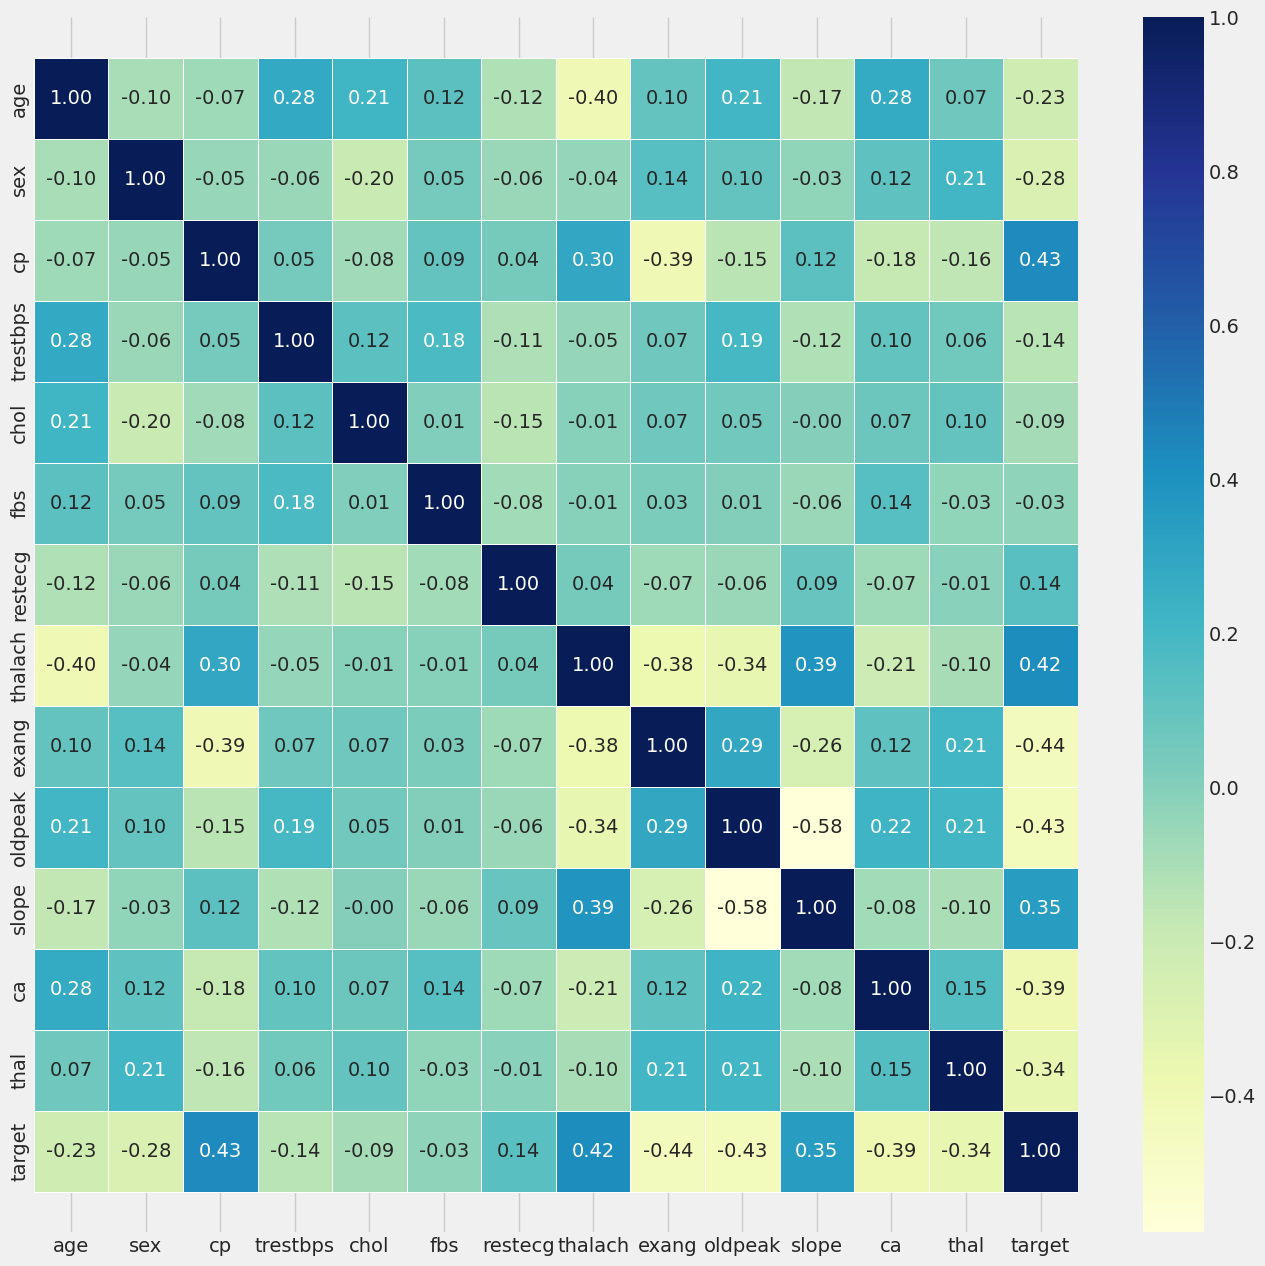

In [20]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Data Processing

In [21]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dataset[continous_val] = sc.fit_transform(dataset[continous_val])

# Splitting the Data into Training Data and Test Data

In [22]:
from sklearn.model_selection import train_test_split

#Spliting the Features And Target
X = data.drop('target', axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)   #80% training and 20% testing
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


# Using GridSearchCV to find the best algorithm for this problem

In [23]:
from sklearn.model_selection import GridSearchCV                              
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Creating a function to calculate best model for this problem

In [24]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.82
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.75
2,random_forest,{'n_estimators': 200},0.81
3,svm,"{'C': 1, 'kernel': 'linear'}",0.81


# Since the Logistic Regression Model has the highest accuracy, we futher fine tune the model using hyperparameter optimization

In [25]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 79%


# Printing the classification report of the performance of the machine learning model

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n\nTrain Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n\nTest Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Creating Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train, y_train)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print("Training set score: {:.3f}".format(lr_clf.score(X_train, y_train)))
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)
print("Test set score: {:.3f}".format(lr_clf.score(X_test, y_test)))



Train Result:
Accuracy Score: 84.71%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.83      0.85       0.85          0.85
recall      0.78   0.90      0.85       0.84          0.85
f1-score    0.82   0.86      0.85       0.84          0.85
support   111.00 131.00      0.85     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 87  24]
 [ 13 118]]

Training set score: 0.847


Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.85  0.86      0.85       0.85          0.85
recall     0.81  0.88      0.85       0.85          0.85
f1-score   0.83  0.87      0.85       0.85          0.85
support   27.00 34.00      0.85      61.00         61.00
_______________________________________________
Confusion Matrix: 
 [[22  5]
 [ 4 3

# Accuracy Score

In [28]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.71,85.25


# Prediction from User input

In [29]:
# Taking the input from user 64,1,3,110,211,0,0,144,1,1.8,1,0,2,
print("Please enter the following detail")
input_data=(int(input("\nAge\n\n")),
            int(input("\nGender\n\n0 for 'Female' \n1 for 'Male'\n\n")),
            int(input("\nChest Pain measurefrom (0-4)\n1: typical angina\n2: atypical angina\n3: non-anginal pain\n4: asymptomatic\n\n")),
            int(input("\nResting Blood Pressure value\n\n")),
            int(input("\nserum cholestoral in mg/dl\n\n")),
            int(input("\nFasting Blood Sugar\n0 for 'lower than 120mg/ml'\n1 for 'greater than 120mg/ml'\n\n")),
            int(input("\nResting Electrocardiographic(ECG) results\n0 for 'normal'\n1 for 'ST-T wave abnormality'\n2 for 'left ventricular hypertrophy'\n\n")),
            int(input("\nMaximum heart rate achieved\n\n")),
            int(input("\nExercised induced Agina\n0 for 'no'\n1 for 'yes'\n\n")),
            float(input("\nST depression induced by exercise relative to rest (0.0-10.0)\n\n")),
            int(input("\nThe slope of the peak exercise ST segment\n1 for 'upsloping'\n2 for 'flat'\n3 for 'downsloping'\n\n")),
            int(input("\nNumber of major vessels (0-4) colored by flourosopy\n\n")),
            int(input("\nThalessemia Value\nthal: 3 = normal; 6 = fixed defect; 7 = reversable defect\n\n"))
            )

Please enter the following detail

Age

35

Gender

0 for 'Female' 
1 for 'Male'

1

Chest Pain measurefrom (0-4)
1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic

2

Resting Blood Pressure value

120

serum cholestoral in mg/dl

20

Fasting Blood Sugar
0 for 'lower than 120mg/ml'
1 for 'greater than 120mg/ml'

1

Resting Electrocardiographic(ECG) results
0 for 'normal'
1 for 'ST-T wave abnormality'
2 for 'left ventricular hypertrophy'

0

Maximum heart rate achieved

210

Exercised induced Agina
0 for 'no'
1 for 'yes'

0

ST depression induced by exercise relative to rest (0.0-10.0)

2.0

The slope of the peak exercise ST segment
1 for 'upsloping'
2 for 'flat'
3 for 'downsloping'

1

Number of major vessels (0-4) colored by flourosopy

2

Thalessemia Value
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

3


In [30]:
input_data_as_numpy_array=np.asarray(input_data)

In [31]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction = lr_clf.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print("\nThis person's heart is healthy 💛💛💛💛")
else:
    print("\nThis person is suffering from heart disease 💔💔💔💔")

[1]

This person is suffering from heart disease 💔💔💔💔


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#saving the trained model

In [ ]:
import joblib

# Saving the model
filename = 'trained_model.sav'
joblib.dump(lr_clf, filename)

# Loading the model
loaded_model = joblib.load(filename)

# Making predictions
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = loaded_model.predict(input_data_reshaped)
if prediction[0] == 0:
    print("\nThis person's heart is healthy 💛💛💛💛")
else:
    print("\nThis person is suffering from heart disease 💔💔💔💔")
